SGDClassifier with max_iter=200

In [2]:
import os
SIGNLANG_PATH = "~/ml/datasets/signLang"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# load data function
def load_signLand_data(signLang_path=SIGNLANG_PATH, file="sign_mnist_train.csv"):
    csv_path = os.path.join(signLang_path, file)
    return pd.read_csv(csv_path)

## Load train data
signs_train = load_signLand_data()
#signs.head()
signs_train.info()
print("Training data array shape:signs_t ",signs_train.shape)
print("Training data length: ",len(signs_train.index))

file_test = "sign_mnist_test.csv"
signs_test = load_signLand_data(SIGNLANG_PATH,file_test)
signs_test.info()
print("Testing data array shape:signs_t ",signs_test.shape)
print("Testing data length: ",len(signs_test.index))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
Training data array shape:signs_t  (27455, 785)
Training data length:  27455
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
Testing data array shape:signs_t  (7172, 785)
Testing data length:  7172


In [3]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)

## Display images
#format into 28x28 pixel image
#index = 200
#someSign = X_train.iloc[index].reshape(28,28)

#show original image
#plt.imshow(someSign)

#show binary image
#print("printing ", y_train[index])
#plt.imshow(someSign, cmap = matplotlib.cm.gray, interpolation="nearest")
#plt.show()





In [4]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#shuffle training set
shuffle_index = np.random.permutation(len(signs_train.index))
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]
someSign = X_train[0]



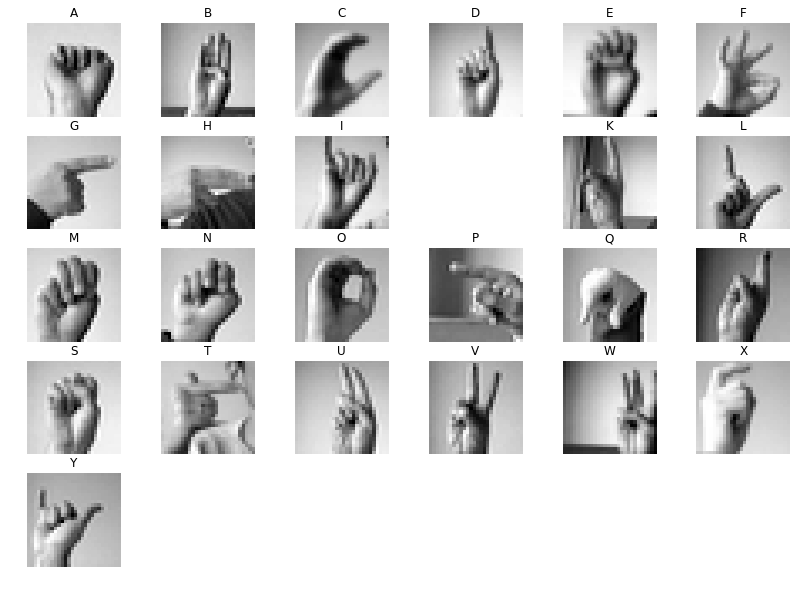

In [30]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    #print(index, signIndex)
    if index == 0:
        SIGN_A = signIndex
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

## Multiclass classification¶

 The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion). 

Using binary classifiers for multiclass classificatino
OvA (One-vesus-All) strategy we need to train 24 binary classifiers
OvO (One-verus-One) strategy, this means we would need to train 276 binary classifiers (N*(N-1)/2), but training sets are smaller because we only use two classes out of 24.

Scikit-Learn automatically detects when you try to use a binary classifier for multi-class classification task, and it automatically runs OvA (except for SVM where it uses OvO, since SVM scale poorly with the size).


In [31]:
## SGDClassifier
sgd_clf = SGDClassifier(random_state = 42, max_iter=200,n_jobs=-1) #use all cpu cores

In [32]:
# train for multi-class classification
sgd_clf.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [33]:
#cross-validation using K-fold with 3 folds
from sklearn.model_selection import cross_val_score
# Cross-validate SGDClassifier accuracy using cross_val_score()
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.99934512,  0.99912587,  0.99901543])

In [34]:
print("testing SGD classifier accuracy...")
sgd_clf.score(X_test, y_test,sample_weight=None)

testing SGD classifier accuracy...


0.63148354712771892

In [35]:
#after classifier gets trained, classes_ array holds the list of target classes
sgd_clf.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [36]:
print("Number of binary classifiers trained: ",len(sgd_clf.classes_))

Number of binary classifiers trained:  24


In [37]:
## Forcing to use OvO classifier strategy with SGDCClassifier 
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42,max_iter=200,tol=None), n_jobs=-1)
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=-1)

In [38]:
print("Number of binary classifiers trained: ",len(ovo_clf.estimators_))

Number of binary classifiers trained:  276


In [39]:
# Cross-validate OvO SGDClassifier accuracy using cross_val_score()
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.99487012,  0.99442745,  0.99584291])

In [40]:
print("testing OvO SGD classifier accuracy...")
ovo_clf.score(X_test, y_test,sample_weight=None)

testing OvO SGD classifier accuracy...


0.70036252091466811

# ERROR ANALYSIS

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#calculaing confusion matrix for SGDClassifier
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[1126,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0, 1144,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0, 1195,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,  957,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0, 1201,    0,    0,    0,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

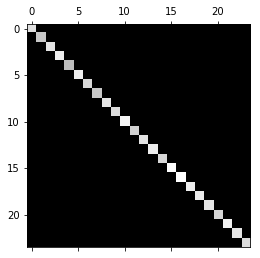

In [42]:
# plotting confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [43]:
#comparing error rates rather than absolute number of erors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

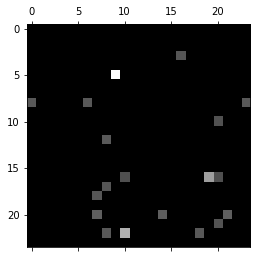

In [44]:
np.fill_diagonal(norm_conf_mx, 0)
#plt.figure(figsize=(10, 10))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()


In [45]:
## Other way to get accuracy metrics with predict function
y_pred = sgd_clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(" SGDClassifier accuracy is ", score)

 SGDClassifier accuracy is  0.631483547128


In [67]:
### KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [68]:
# test KNN classifier
y_knn_pred = knn_clf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.81023424428332402

In [66]:
y_pred = knn_clf.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [82]:
## GRID SEARCH FOR BEST HYPERPARAMETERS
from sklearn.model_selection import GridSearchCV

param_grid = [{
  #           'alpha': [0.0001, 0.001, 0.01], 
  #           'epsilon': [1.0, 0.1, 0.01]
   #            'algorithm': ["auto", "ball_tree","kd_tree","brute"],
              'n_neighbors':[4, 5, 6], 
               'leaf_size':[5, 15, 30, 50]
              }]

knn_clf_turbo = KNeighborsClassifier(n_jobs=-1, weights='distance')
grid_search = GridSearchCV(knn_clf_turbo, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

#print("testing SGD classifier accuracy...")
#sgd_clf.score(X_test, y_test,sample_weight=None)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] leaf_size=5, n_neighbors=4 ......................................
[CV] leaf_size=5, n_neighbors=4 ......................................
[CV] leaf_size=5, n_neighbors=4 ......................................
[CV] leaf_size=5, n_neighbors=5 ......................................
[CV]  leaf_size=5, n_neighbors=4, score=0.9978170705086226, total= 5.2min
[CV] leaf_size=5, n_neighbors=5 ......................................
[CV]  leaf_size=5, n_neighbors=4, score=0.9975961538461539, total= 5.2min
[CV] leaf_size=5, n_neighbors=5 ......................................
[CV]  leaf_size=5, n_neighbors=4, score=0.9982496444590307, total= 5.3min
[CV] leaf_size=5, n_neighbors=6 ......................................
[CV]  leaf_size=5, n_neighbors=5, score=0.9973804846103471, total= 6.2min
[CV] leaf_size=5, n_neighbors=6 ......................................
[CV]  leaf_size=5, n_neighbors=5, score=0.9972683566433567, total= 6.4min
[

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 90.0min


[CV]  leaf_size=30, n_neighbors=6, score=0.9973804846103471, total= 4.9min
[CV] leaf_size=50, n_neighbors=4 .....................................
[CV]  leaf_size=30, n_neighbors=6, score=0.996722027972028, total= 4.9min
[CV] leaf_size=50, n_neighbors=4 .....................................
[CV]  leaf_size=50, n_neighbors=4, score=0.9978170705086226, total= 4.0min
[CV] leaf_size=50, n_neighbors=5 .....................................
[CV]  leaf_size=30, n_neighbors=6, score=0.9977026583524778, total= 5.3min
[CV] leaf_size=50, n_neighbors=5 .....................................
[CV]  leaf_size=50, n_neighbors=4, score=0.9975961538461539, total= 3.7min
[CV] leaf_size=50, n_neighbors=5 .....................................
[CV]  leaf_size=50, n_neighbors=4, score=0.9982496444590307, total= 3.7min
[CV] leaf_size=50, n_neighbors=6 .....................................
[CV]  leaf_size=50, n_neighbors=5, score=0.9973804846103471, total= 4.3min
[CV] leaf_size=50, n_neighbors=6 .................

[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 124.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'leaf_size': [5, 15, 30, 50], 'n_neighbors': [4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [84]:
grid_search.score(X_test, y_test)

0.81023424428332402

In [85]:
grid_search.best_params_

{'leaf_size': 5, 'n_neighbors': 4}

In [86]:
grid_search.best_score_

0.99788745219450015

In [102]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'leaf_size': 5, 'n_neighbors': 4}
nan {'leaf_size': 5, 'n_neighbors': 5}
nan {'leaf_size': 5, 'n_neighbors': 6}
nan {'leaf_size': 15, 'n_neighbors': 4}
nan {'leaf_size': 15, 'n_neighbors': 5}
nan {'leaf_size': 15, 'n_neighbors': 6}
nan {'leaf_size': 30, 'n_neighbors': 4}
nan {'leaf_size': 30, 'n_neighbors': 5}
nan {'leaf_size': 30, 'n_neighbors': 6}
nan {'leaf_size': 50, 'n_neighbors': 4}
nan {'leaf_size': 50, 'n_neighbors': 5}
nan {'leaf_size': 50, 'n_neighbors': 6}


/home/rem/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
# manually verfiy KNN classifiers for best test accuracy
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4, leaf_size=30, p=1 )
knn_clf.fit(X_train, y_train)
# test KNN classifier
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)


0.81441717791411039

In [33]:
## GRID SEARCH FOR BEST HYPERPARAMETERS

from sklearn.model_selection import GridSearchCV

param_grid = [{
  #           'alpha': [0.0001, 0.001, 0.01], 
  #           'epsilon': [1.0, 0.1, 0.01]
  #             'loss': ["hinge", "log","modified_huber","squared_hinge","perceptron"],
              'max_iter':[40, 45, 50, 55, 60], 
    'penalty':["none", "l2", "l1", "elasticnet"],
  #             'power_t':[0.1, 0.5, 1.0]
              }]

sgd_clf_turbo = SGDClassifier(random_state = 42, n_jobs=-1,alpha= 0.01, epsilon= 1.0) #use all cpu cores
grid_search = GridSearchCV(sgd_clf_turbo, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

#print("testing SGD classifier accuracy...")
#sgd_clf.score(X_test, y_test,sample_weight=None)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_iter=40, penalty=none .......................................
[CV] max_iter=40, penalty=none .......................................
[CV] max_iter=40, penalty=none .......................................
[CV] max_iter=40, penalty=l2 .........................................
[CV]  max_iter=40, penalty=none, score=0.7437240777122899, total=  34.2s
[CV] max_iter=40, penalty=l2 .........................................
[CV]  max_iter=40, penalty=none, score=0.758631993006993, total=  35.1s
[CV] max_iter=40, penalty=l2 .........................................
[CV]  max_iter=40, penalty=none, score=0.7673121102723991, total=  35.8s
[CV] max_iter=40, penalty=l1 .........................................
[CV]  max_iter=40, penalty=l2, score=0.9771883868151059, total=  35.4s
[CV] max_iter=40, penalty=l1 .........................................
[CV]  max_iter=40, penalty=l2, score=0.9022071678321678, total=  32.8s
[CV] max_it

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 10.1min


[CV]  max_iter=50, penalty=none, score=0.7752981074280714, total=  40.9s
[CV] max_iter=50, penalty=l2 .........................................
[CV]  max_iter=50, penalty=l2, score=0.9855926653569089, total=  41.4s
[CV] max_iter=50, penalty=l2 .........................................
[CV]  max_iter=50, penalty=l2, score=0.9704982517482518, total=  40.4s
[CV] max_iter=50, penalty=l1 .........................................
[CV]  max_iter=45, penalty=elasticnet, score=0.9873251748251748, total= 3.1min
[CV] max_iter=50, penalty=l1 .........................................
[CV]  max_iter=50, penalty=l2, score=0.9898260584181162, total=  39.1s
[CV] max_iter=50, penalty=l1 .........................................
[CV]  max_iter=45, penalty=elasticnet, score=0.9921234000656384, total= 3.2min
[CV] max_iter=50, penalty=elasticnet .................................
[CV]  max_iter=50, penalty=l1, score=0.7513643309321109, total= 3.0min
[CV] max_iter=50, penalty=elasticnet ......................

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 31.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=1.0,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'penalty': ['none', 'l2', 'l1', 'elasticnet'], 'max_iter': [40, 45, 50, 55, 60]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [34]:
grid_search.score(X_test, y_test)

0.6515616285554936

In [35]:
grid_search.best_params_

{'max_iter': 50, 'penalty': 'elasticnet'}

In [36]:
grid_search.best_score_

0.99544709524676744

In [37]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.6515616285554936

In [83]:
# test new hyperparameters
sgd_clf2 = SGDClassifier(alpha=0.01, average=True, class_weight= 'balanced', epsilon=1.0,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=43,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)
# train for multi-class classification
sgd_clf2.fit(X_train, y_train)
print("testing SGD classifier accuracy...")
sgd_clf2.score(X_test, y_test,sample_weight=None)

testing SGD classifier accuracy...


0.67024539877300615

In [107]:
## Randomized Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from scipy.stats import randint

# see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'penalty': ['l2', 'l1','elasticnet'],
        #'alpha': randint(low=0.01, high=1.0),
        'epsilon': reciprocal(0.001, 10.0),
        'power_t': randint(low=0.01, high=10.0)
    }

sgd_clf_turbo2 = SGDClassifier(random_state = 42, n_jobs=-1, max_iter = 45) #use all cpu cores
rnd_search = RandomizedSearchCV(sgd_clf_turbo2, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] power_t=7, epsilon=0.0314891164796, penalty=l2 ..................
[CV] power_t=7, epsilon=0.0314891164796, penalty=l2 ..................
[CV] power_t=7, epsilon=0.0314891164796, penalty=l2 ..................
[CV] power_t=7, epsilon=0.0314891164796, penalty=l2 ..................
[CV] ... power_t=7, epsilon=0.0314891164796, penalty=l2, total=  47.9s
[CV] power_t=7, epsilon=0.0314891164796, penalty=l2 ..................
[CV] ... power_t=7, epsilon=0.0314891164796, penalty=l2, total=  49.7s
[CV] power_t=9, epsilon=0.248104097487, penalty=elasticnet ...........
[CV] ... power_t=7, epsilon=0.0314891164796, penalty=l2, total=  49.8s
[CV] power_t=9, epsilon=0.248104097487, penalty=elasticnet ...........
[CV] ... power_t=7, epsilon=0.0314891164796, penalty=l2, total=  49.8s
[CV] power_t=9, epsilon=0.248104097487, penalty=elasticnet ...........
[CV] ... power_t=7, epsilon=0.0314891164796, penalty=l2, total=  41.6s
[CV] power_t=9,

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 27.7min


[CV] .... power_t=8, epsilon=0.016480446428, penalty=l1, total= 3.3min
[CV] power_t=9, epsilon=0.0146189627937, penalty=elasticnet ..........
[CV] .... power_t=8, epsilon=0.016480446428, penalty=l1, total= 3.6min
[CV] power_t=9, epsilon=0.0146189627937, penalty=elasticnet ..........
[CV]  power_t=9, epsilon=0.0146189627937, penalty=elasticnet, total= 4.7min
[CV] power_t=9, epsilon=0.0146189627937, penalty=elasticnet ..........
[CV]  power_t=9, epsilon=0.0146189627937, penalty=elasticnet, total= 4.7min
[CV] power_t=2, epsilon=0.00153696031106, penalty=elasticnet .........
[CV]  power_t=9, epsilon=0.0146189627937, penalty=elasticnet, total= 4.7min
[CV] power_t=2, epsilon=0.00153696031106, penalty=elasticnet .........
[CV]  power_t=9, epsilon=0.0146189627937, penalty=elasticnet, total= 4.9min
[CV] power_t=2, epsilon=0.00153696031106, penalty=elasticnet .........
[CV]  power_t=9, epsilon=0.0146189627937, penalty=elasticnet, total= 4.9min
[CV] power_t=2, epsilon=0.00153696031106, penalty=el

[CV] .. power_t=1, epsilon=0.00678838791242, penalty=l1, total= 3.3min
[CV] power_t=1, epsilon=0.00678838791242, penalty=l1 .................
[CV] .. power_t=1, epsilon=0.00678838791242, penalty=l1, total= 3.3min
[CV] power_t=9, epsilon=1.26046645856, penalty=l1 ....................
[CV] .. power_t=1, epsilon=0.00678838791242, penalty=l1, total= 3.3min
[CV] power_t=9, epsilon=1.26046645856, penalty=l1 ....................
[CV] .. power_t=1, epsilon=0.00678838791242, penalty=l1, total= 3.3min
[CV] power_t=9, epsilon=1.26046645856, penalty=l1 ....................
[CV] .. power_t=1, epsilon=0.00678838791242, penalty=l1, total= 3.2min
[CV] power_t=9, epsilon=1.26046645856, penalty=l1 ....................
[CV] ..... power_t=9, epsilon=1.26046645856, penalty=l1, total= 3.3min
[CV] power_t=9, epsilon=1.26046645856, penalty=l1 ....................
[CV] ..... power_t=9, epsilon=1.26046645856, penalty=l1, total= 3.3min
[CV] power_t=7, epsilon=3.79585314267, penalty=l1 ....................
[CV] .

[CV] power_t=6, epsilon=0.0271558195528, penalty=l2 ..................
[CV] ... power_t=6, epsilon=0.0271558195528, penalty=l2, total=  45.6s
[CV] power_t=6, epsilon=0.0271558195528, penalty=l2 ..................
[CV] ... power_t=6, epsilon=0.0271558195528, penalty=l2, total=  45.0s
[CV] power_t=6, epsilon=0.0271558195528, penalty=l2 ..................
[CV] ... power_t=6, epsilon=0.0271558195528, penalty=l2, total=  45.6s
[CV] power_t=6, epsilon=0.0271558195528, penalty=l2 ..................
[CV]  power_t=2, epsilon=0.672093005016, penalty=elasticnet, total= 4.1min
[CV] power_t=0, epsilon=2.51277909995, penalty=l1 ....................
[CV] ... power_t=6, epsilon=0.0271558195528, penalty=l2, total=  43.6s
[CV]  power_t=2, epsilon=0.672093005016, penalty=elasticnet, total= 4.1min
[CV] power_t=0, epsilon=2.51277909995, penalty=l1 ....................


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 116.0min


[CV] power_t=0, epsilon=2.51277909995, penalty=l1 ....................
[CV] ... power_t=6, epsilon=0.0271558195528, penalty=l2, total=  45.0s
[CV] power_t=0, epsilon=2.51277909995, penalty=l1 ....................
[CV] ..... power_t=0, epsilon=2.51277909995, penalty=l1, total= 3.3min
[CV] power_t=0, epsilon=2.51277909995, penalty=l1 ....................
[CV] ..... power_t=0, epsilon=2.51277909995, penalty=l1, total= 3.3min
[CV] power_t=7, epsilon=0.00179569842257, penalty=elasticnet .........
[CV] ..... power_t=0, epsilon=2.51277909995, penalty=l1, total= 3.3min
[CV] power_t=7, epsilon=0.00179569842257, penalty=elasticnet .........
[CV] ..... power_t=0, epsilon=2.51277909995, penalty=l1, total= 3.3min
[CV] power_t=7, epsilon=0.00179569842257, penalty=elasticnet .........
[CV] ..... power_t=0, epsilon=2.51277909995, penalty=l1, total= 3.7min
[CV] power_t=7, epsilon=0.00179569842257, penalty=elasticnet .........
[CV]  power_t=7, epsilon=0.00179569842257, penalty=elasticnet, total= 4.8min


[CV] power_t=2, epsilon=5.90764353456, penalty=elasticnet ............
[CV]  power_t=2, epsilon=5.90764353456, penalty=elasticnet, total= 4.9min
[CV] power_t=9, epsilon=0.00441453687649, penalty=l1 .................
[CV] .. power_t=9, epsilon=0.00441453687649, penalty=l1, total= 3.7min
[CV] power_t=9, epsilon=0.00441453687649, penalty=l1 .................
[CV]  power_t=2, epsilon=5.90764353456, penalty=elasticnet, total= 4.7min
[CV] power_t=9, epsilon=0.00441453687649, penalty=l1 .................
[CV]  power_t=2, epsilon=5.90764353456, penalty=elasticnet, total= 4.6min
[CV] power_t=9, epsilon=0.00441453687649, penalty=l1 .................
[CV]  power_t=2, epsilon=5.90764353456, penalty=elasticnet, total= 4.6min
[CV] power_t=9, epsilon=0.00441453687649, penalty=l1 .................
[CV] .. power_t=9, epsilon=0.00441453687649, penalty=l1, total= 3.2min
[CV] power_t=4, epsilon=1.7079750343, penalty=l2 .....................
[CV] .. power_t=9, epsilon=0.00441453687649, penalty=l1, total= 3

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 188.4min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=45, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=4,
          param_distributions={'power_t': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f4d2de208>, 'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9f4d2f45f8>, 'penalty': ['l2', 'l1', 'elasticnet']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [108]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.11124121539 {'power_t': 7, 'penalty': 'l2', 'epsilon': 0.031489116479568605}
1.08651441208 {'power_t': 9, 'penalty': 'elasticnet', 'epsilon': 0.24810409748678097}
1.08651441208 {'power_t': 7, 'penalty': 'elasticnet', 'epsilon': 0.0042070539502879357}
1.08651441208 {'power_t': 5, 'penalty': 'elasticnet', 'epsilon': 0.021618942406574426}
2.23905500789 {'power_t': 5, 'penalty': 'l1', 'epsilon': 0.0016813042706040665}
1.11124121539 {'power_t': 0, 'penalty': 'l2', 'epsilon': 0.0010071984838809192}
2.23905500789 {'power_t': 8, 'penalty': 'l1', 'epsilon': 0.016480446427978964}
1.08651441208 {'power_t': 9, 'penalty': 'elasticnet', 'epsilon': 0.014618962793704957}
1.08651441208 {'power_t': 2, 'penalty': 'elasticnet', 'epsilon': 0.0015369603110608834}
1.11124121539 {'power_t': 2, 'penalty': 'l2', 'epsilon': 0.033872555658521472}
1.08651441208 {'power_t': 4, 'penalty': 'elasticnet', 'epsilon': 2.7527173929429387}
2.23905500789 {'power_t': 3, 'penalty': 'l1', 'epsilon': 0.063386534415362544}
2.2

In [109]:
y_pred = rnd_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.64110429447852757